<center><img src="https://yt3.ggpht.com/ytc/AKedOLRcwXL5heetbKNzpLCY3LOgml-72EcmpALhcvry5g=s900-c-k-c0x00ffffff-no-rj" alt="Logo" width="80" height="80"></center>

<center><h3> Part III: Data Analysis </h3></center>

```diff
- TO DO:

- 1. Find/add plotly functions from past assignment (where?)

- 2. Pass in multiple countries for analysis: plotly may be able to do this easier than hard coding



- 2. Additional info in markdown for each step.

- 3. Copy/paste background info from data collec file.

- 4. Additional notes in markdown for each step

- 5. Notebook organization/headers


@ TO DO: EVENTUALLY

@ 1. Rethink data acq/cleaning organization - can concat csvs earlier on in notebook 1.

@ 2. Move these functions to a script. May need to do anyways for streamlit


+ QUESTIONS

+ Way to make mp3 play in streamlit app? From play_url

+ warning code. why



+ SQL integration? Some of these pandas functions work better in SQL

+ Best setup for speed?


```

#### Background

In [ ]:
# Copy/Paste some markdown from other file.

.

#### Imports

In [80]:
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
import json
import urllib
import os

.

Importing dictionary for country key.

In [82]:
import csv

codes = {}
with open("./data/codes.csv", mode='r') as inp:
    reader = csv.reader(inp)
    codes = {rows[1]:rows[0] for rows in reader}
    
codes.pop('Code')

'Name'

In [83]:
codes['BZ']

'Belize'

.

Make a country_options list for currently available countries.

<div class="alert alert-block alert-info"> Important variables </div>

In [84]:
countries_tiktok = [i[9:11] for i in os.listdir('./data/clean') if not i.startswith('.')]
country_options = [codes[i] for i in countries_tiktok]

Due to limits of pulling data and the fact that it was pulled in alphabetical order, some of these countries are less common (i.e. not usually prioritized for social media stats apps.) If you're from Greenland or the Falkman Islands and want to understand your local tiktok trends this is good news

Eventually all countries will be included

.

### More data cleaning

Read in all data and concat

In [85]:
dflist = [pd.read_csv('./data/clean/'+i, index_col=[0]) for i in os.listdir('./data/clean') if not i.startswith('.')]

In [86]:
df = pd.concat(dflist)

In [87]:
df.head(4)

,region,aweme_id,create_time,desc,author.uid,author.nickname,author.signature,author.commerce_user_level,is_ads,share_url,...,hash_eestitiktok,hash_estonia,hash_gambiantiktok,hash_tiktokgambia,hash_finland,hash_fry,hash_hockey,hash_suomi,hash_haiti,hash_haitiantiktok
0,US,7070562305905560878,1646243574,,6951439290073433093,EliteFam World,NY🗽🇭🇳\nInstagram: @Elitefamjay\nComedian/YouTu...,0,False,https://www.tiktok.com/@therealelitefamworld/v...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SV,7101169216086117637,1653369804,🤎 #fyp,6806398212888183814,Nik,🇸🇻,0,False,https://www.tiktok.com/@nicollear04/video/7101...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,7072408243003198766,1646673365,,6820077759478760453,zulma Alvarez,C:Zulmaalvarez01\nZ:2106063457,0,False,https://www.tiktok.com/@zulma_aguirre/video/70...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HN,7101129218712489221,1653360490,😅🤣🤣,7014636704536380421,laflakita752,una persona muy cencible,0,False,https://www.tiktok.com/@laflakita752/video/710...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df.to_csv('./data/tiktok.csv')

In [95]:
len(df)

74197

.

Make list of hashtags for filtering

In [89]:
hashs= [i for i in df.columns if i.startswith("hash")]

.

Re-Fill NaNs in hashtag columns

In [90]:
df[hashs]=df[hashs].fillna(0)

In [91]:
df['fyp_location'].head(4)

0    Honduras
1    Honduras
2    Honduras
3    Honduras
Name: fyp_location, dtype: object

.

## Hashtags - EDA And Filter

### Trending Hashtags: Entire World

In [93]:
top10 = pd.DataFrame(df[hashs].sum()).sort_values(by=0, ascending=False).head(20).reset_index().rename(
        columns={'index': "hashtag", 0: "count"});
top10['hashtag']=top10['hashtag'].str.replace("hash_", "#");
top10.

/var/folders/zd/6jtvs5r55vvdpnl2c2q7kv0m0000gn/T/ipykernel_76529/3023602279.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,hashtag,count
0,#fyp,18295.0
1,#foryou,9612.0
2,#viral,8365.0
3,#fypシ,6375.0
4,#foryoupage,5542.0
5,#tiktok,1350.0
6,#funny,1341.0
7,#trending,1187.0
8,#parati,1099.0
9,#fy,915.0


.

### Trending Hashtags By Country

Define a function to return top 10 hashtags by country

In [14]:
def top10_hash(location):
    filter = df[df['fyp_location']==location]
    title = 'Tranding Hashtags - ' + location
    
    top10 = pd.DataFrame(filter[hashs].sum()).sort_values(by=0, ascending=False).head(10).reset_index().rename(
        columns={'index': title, 0: "count"});
    top10[title]=top10[title].str.replace("hash_", "#");
    return(top10)

.

Add plotly to function - in old assignments somewhere.

In [15]:
"""pseudocode"""
def top10_viz(location):
    pass

.

In [16]:
top10_hash('Belize')

/var/folders/zd/6jtvs5r55vvdpnl2c2q7kv0m0000gn/T/ipykernel_76529/592014375.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top10 = pd.DataFrame(filter[hashs].sum()).sort_values(by=0, ascending=False).head(10).reset_index().rename(


,Tranding Hashtags - Belize,count
0,#fyp,187.0
1,#foryou,72.0
2,#viral,69.0
3,#foryoupage,68.0
4,#fypシ,67.0
5,#belizeantiktokers,39.0
6,#belize,19.0
7,#funny,19.0
8,#belizean,19.0
9,#trending,14.0


.

In [17]:
"""
User_selection_from_country_list
"""

'\nUser_selection_from_country_list\n'

.

## Music - EDA and Filter 

Make mini table for joining

In [18]:
# SQL mode - table to join for reference.
# Multi-agg for columns in pandas is available now, but I'm used to doing this

musicref = df[['music.mid', 'music.title', 'music.author', 'music.play_url.uri']]

.

### Trending Music - Entire World

Duplicate titles are being kept for this analysis, since trending music is less about the actual song and more about using the trending sounds to up your view count and increase visibility of your content.

Any duplicates should have different play URLs and IDs. Duplicate music IDs have already been dropped. 

In [20]:
top10 = df.groupby('music.mid').count().sort_values(by='desc', ascending=False)['desc'].head(10).reset_index()

top10_url = pd.merge(how='left', 
                     left=top10, 
                     right=musicref, 
                     left_on='music.mid', 
                     right_on='music.mid').drop_duplicates('music.mid').head(10).reset_index().rename(
    columns={'desc': "Count", 'music.title':'Trending Sounds - International', 'music.author':'Author', 'music.play_url.uri':'Play Url'});

top10_url[['Trending Sounds - International', 'Author', 'Count', 'Play Url']]

,Trending Sounds - International,Author,Count,Play Url
0,Love You So,The King Khan & BBQ Show,1503,https://sf16-ies-music-va.tiktokcdn.com/obj/to...
1,Jiggle Jiggle,Duke & Jones & Louis Theroux,375,https://sf77-ies-music-va.tiktokcdn.com/obj/to...
2,taehyun is so bf (Contains music from: Fury - ...,"Contains music from: ""Fury""",316,https://sf16-ies-music.tiktokcdn.com/obj/ies-m...
3,Monkeys Spinning Monkeys,Kevin MacLeod & Kevin The Monkey,304,https://sf77-ies-music-va.tiktokcdn.com/obj/to...
4,Gogo Dance,El Alfa & Chael Produciendo,187,https://sf16-ies-music-va.tiktokcdn.com/obj/to...
5,Buga (Lo Lo Lo),Kizz Daniel & Tekno,169,https://sf16-ies-music-va.tiktokcdn.com/obj/to...
6,About Damn Time,Lizzo,159,https://sf16-ies-music-va.tiktokcdn.com/obj/to...
7,About Damn Time,Lizzo,149,https://sf16-ies-music-va.tiktokcdn.com/obj/to...
8,whyisthisaudiofamous (Contains music from: Pis...,"Contains music from: ""Pistol""",125,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
9,Sway (Sped Up Version),Michael Bublé,120,https://sf16-ies-music-va.tiktokcdn.com/obj/to...


In [32]:
top10_url.loc[2, "Trending Sounds - International"] = 'taehyun is so bf'
top10_url.loc[8, "Trending Sounds - International"] = 'whyisthisaudiofamous'

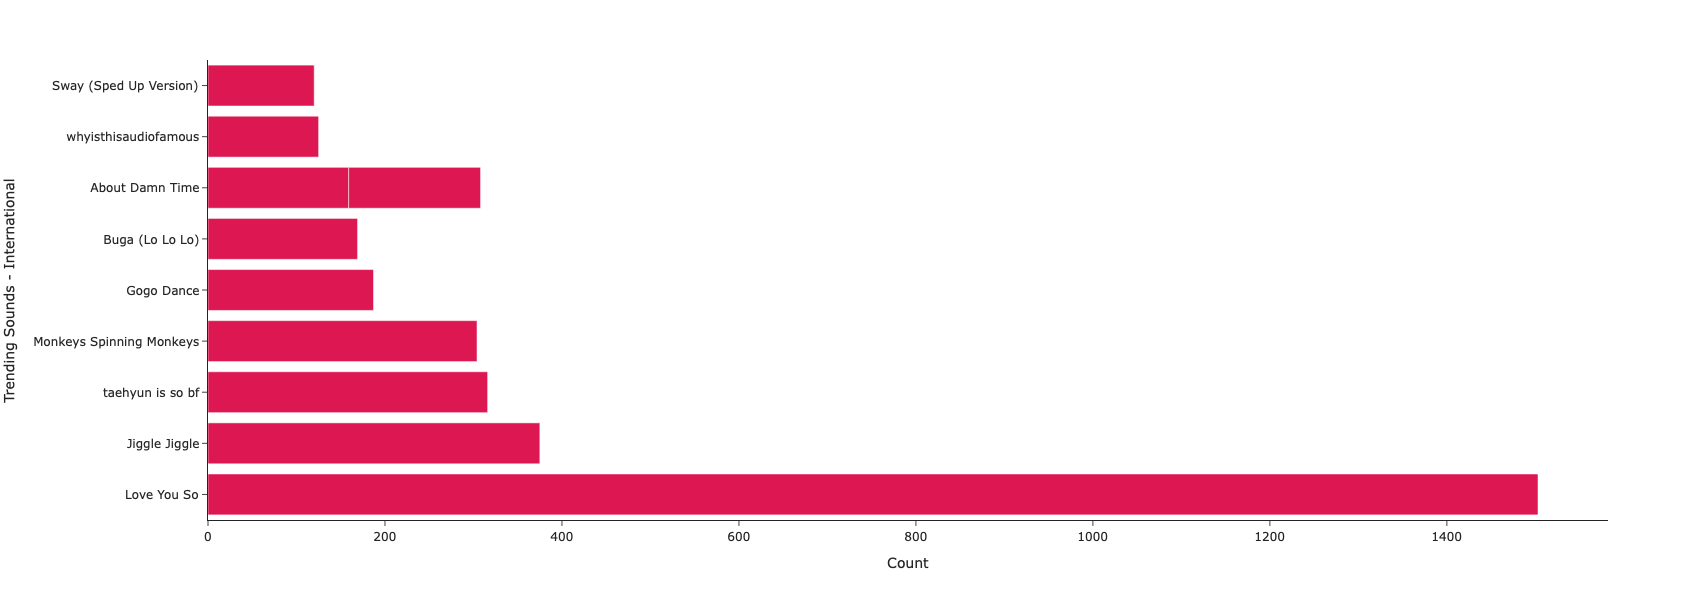

In [79]:
import plotly.express as px
fig = px.bar(top10_url, y='Trending Sounds - International', x='Count', width=1700, color_discrete_sequence=['#DC1752', '#EA1155', '#E51050', '#EE094E', '#FA004B'], template="simple_white", height=600, orientation='h')
fig.update_xaxes(tickangle=0)
fig.show()

.

### Trending Sounds: By Country

Define a function to return top 10 trending songs (ITEMS) by country.
Include URL to trending song.

In [57]:
def top10_playurl(location):
    filter = df[df['fyp_location']==location]
    title = 'Trending Sounds - ' + location
    
    top10 = filter.groupby('music.mid').count().sort_values(by='desc', ascending=False)['desc'].head(10).reset_index()

    top10_url = pd.merge(how='left', 
                     left=top10, 
                     right=musicref, 
                     left_on='music.mid', 
                     right_on='music.mid').drop_duplicates('music.mid').head(10).reset_index().rename(
        columns={'desc': "Count", 'music.title':title, 'music.author':'Author', 'music.play_url.uri':'Play Url'});

    return(top10_url[[title, 'Author', 'Play Url', 'Count']])

*Note: Doing this in sql would be easier for aggs - can add play count.*

.

Define another function to return plotly viz based on user input or add onto previous function.

In [58]:
"""pseudocode"""
def top10_viz(location):
    pass

.

In [59]:
top10_playurl('Belize')

,Trending Sounds - Belize,Author,Play Url,Count
0,Love You So,The King Khan & BBQ Show,https://sf16-ies-music-va.tiktokcdn.com/obj/to...,20
1,Forever,Labrinth,https://sf16-ies-music-va.tiktokcdn.com/obj/to...,6
2,Monkeys Spinning Monkeys,Kevin MacLeod & Kevin The Monkey,https://sf77-ies-music-va.tiktokcdn.com/obj/to...,4
3,Gogo Dance,El Alfa & Chael Produciendo,https://sf16-ies-music-va.tiktokcdn.com/obj/to...,4
4,You're The One I Love,Shenseea & Rvssian,https://sf16-ies-music-va.tiktokcdn.com/obj/to...,4
5,Get You The Moon,Kina,https://sf77-ies-music-va.tiktokcdn.com/obj/to...,3
6,Sunroof,Nicky Youre & dazy,https://sf16-ies-music-va.tiktokcdn.com/obj/to...,3
7,original sound - belizeanpride,🇧🇿BelizeanPride🇧🇿,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,3
8,About Damn Time,Lizzo,https://sf16-ies-music-va.tiktokcdn.com/obj/to...,3
9,original sound - otp_control (Contains music f...,"Contains music from: ""Bwoii Affi"" Watch Eh Style""",https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,3


.

### Trending Artists: International

In [74]:
top10 = df.groupby('music.author').count().sort_values(by='desc', ascending=False)['desc'].head(12).reset_index()
top10 = top10.rename(columns={'music.author':'Trending Artists - International', 'desc':'Count of Videos'})
top10

,Trending Artists - International,Count of Videos
0,The King Khan & BBQ Show,1506
1,Duke & Jones & Louis Theroux,375
2,Tik Toker,334
3,Lizzo,308
4,Kevin MacLeod & Kevin The Monkey,305
5,El Alfa & Chael Produciendo,278
6,"Contains music from: ""Fury""",240
7,Kizz Daniel & Tekno,227
8,"Contains music from: ""Wait a Minute!""",172
9,TimTaj,164


In [75]:
top10.drop(index=2, inplace=True) #tik toker
top10.drop(index=6, inplace=True) #fury

In [76]:
top10.loc[8, "Trending Artists - International"] = '1Biggs Don'

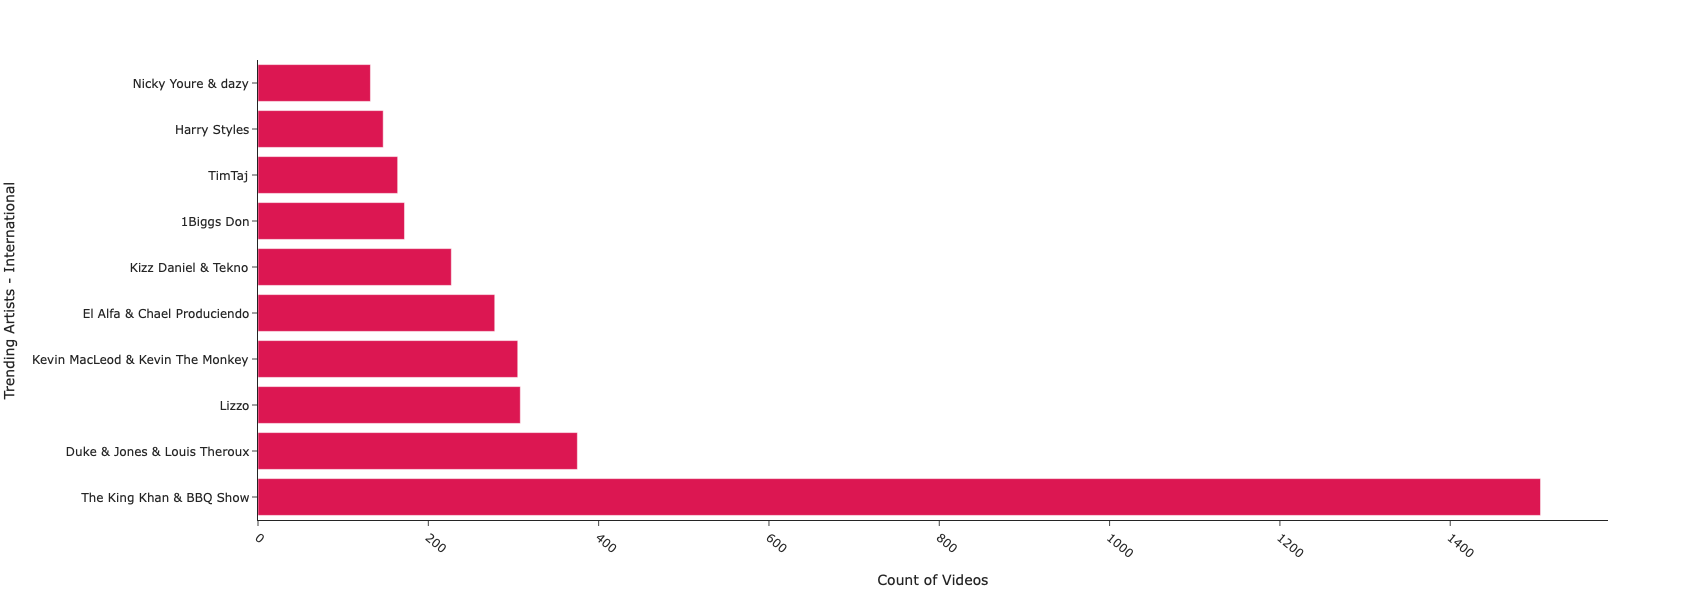

In [78]:
import plotly.express as px
fig = px.bar(top10, x='Count of Videos', y='Trending Artists - International', width=1700, color_discrete_sequence=['#DC1752', '#EA1155', '#E51050', '#EE094E', '#FA004B'], template="simple_white", height=600,
            orientation='h')
fig.update_xaxes(tickangle=40)
fig.show()

.

### Trending Artists: By Country

Note that for all entries in the dataframe, "Author" field has been replaced by "Mixed Author" for cases where there was a pgc sound match.

In [187]:
def top10_artist(location):
    filter = df[df['fyp_location']==location]
    title = 'Trending Artists - ' + location
    
    top10 = filter.groupby('music.author').count().sort_values(by='desc', ascending=False)['desc'].head(10).reset_index()
    top10 = top10.rename(columns={'music.author':title, 'desc':'Count'})
    return(top10)

In [188]:
top10_artist('Belize')

,Trending Artists - Belize,Count
0,The King Khan & BBQ Show,20
1,Labrinth,7
2,Shenseea & Rvssian,4
3,Zachery Dereniowski,4
4,Deborah yowa,4
5,TimTaj,4
6,El Alfa & Chael Produciendo,4
7,Lizzo,4
8,Kevin MacLeod & Kevin The Monkey,4
9,Kina,4
